In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(42)

In [3]:
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers

array([[ 0.14901425, -0.04147929],
       [ 0.19430656,  0.45690896],
       [-0.07024601, -0.07024109],
       [ 0.47376384,  0.23023042],
       [-0.14084232,  0.16276801],
       [-0.13902531, -0.13971893],
       [ 0.07258868, -0.57398407],
       [-0.51747535, -0.16868626],
       [-0.30384934,  0.0942742 ],
       [-0.27240722, -0.42369111],
       [ 0.43969463, -0.06773289],
       [ 0.02025846, -0.42742446],
       [-0.16331482,  0.03327678],
       [-0.34529807,  0.11270941],
       [-0.18019161, -0.08750812],
       [-0.18051198,  0.55568346],
       [-0.00404917, -0.31731328],
       [ 0.24676347, -0.36625309],
       [ 0.06265908, -0.58790104],
       [-0.39845581,  0.05905837],
       [ 0.22153997,  0.05141048],
       [-0.03469448, -0.09033111],
       [-0.4435566 , -0.21595326],
       [-0.13819163,  0.31713667],
       [ 0.10308549, -0.52891205],
       [ 0.09722519, -0.11552468],
       [-0.2030766 ,  0.18350289],
       [ 0.30929986,  0.27938404],
       [-0.25176526,

In [4]:
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_inliers 

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [5]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers

array([[ 3.01898458,  1.92614894],
       [ 1.57612593,  1.61987267],
       [-1.12407079, -1.65126525],
       [ 2.47488924,  2.48090716],
       [ 2.93657855,  3.30592442],
       [ 0.09073919,  0.01213036],
       [ 2.38636143,  1.19971145],
       [ 1.61573502,  2.36634136],
       [ 3.12004273, -1.29603875],
       [-0.99533638, -3.24814448],
       [ 0.62624113, -3.71246181],
       [-0.27521585,  0.34115708],
       [-1.70766998,  0.72666608],
       [-3.755998  , -3.70121449],
       [ 2.58080449, -1.11847487],
       [-2.9835159 ,  0.17794608],
       [ 2.15994842, -2.27343178],
       [ 0.98312381, -3.31722028],
       [-3.58654623,  0.25083705],
       [ 0.32508097,  1.09943921]])

In [6]:
X = np.r_[X_inliers, X_outliers]
X

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [7]:
X.shape

(220, 2)

In [20]:
type(X)

numpy.ndarray

In [8]:
n_outliers = len(X_outliers)
n_outliers

20

In [9]:
ground_truth = np.ones(len(X), dtype=int)
ground_truth

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
ground_truth[-n_outliers:] = -1

In [11]:
ground_truth

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [12]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [13]:
y_pred = clf.fit_predict(X)

In [14]:
n_errors = (y_pred != ground_truth).sum()

In [15]:
X_scores = clf.negative_outlier_factor_
X_scores

array([-0.99994411, -1.14405944, -0.97422441, -1.29043229, -0.96406015,
       -0.967451  , -1.16897405, -1.17786476, -1.01083896, -1.14511932,
       -1.21255557, -1.05066867, -0.96961357, -1.02846721, -0.96108146,
       -1.30563699, -1.01782283, -1.09341031, -1.20053   , -1.048392  ,
       -1.04273309, -0.96537973, -1.12978593, -1.04714221, -1.1241528 ,
       -0.97795087, -0.97358493, -1.13261793, -0.98280096, -1.02069094,
       -0.95891097, -1.1491003 , -1.11886905, -0.99855726, -0.99357848,
       -1.13283666, -1.1460512 , -1.87981613, -0.95747372, -1.2240096 ,
       -0.9432555 , -1.25135605, -1.00309851, -1.10715506, -0.97725017,
       -0.99886729, -0.97739557, -1.09329811, -0.99310409, -0.96318902,
       -1.08969429, -0.97382438, -0.94892287, -1.42556212, -0.96379941,
       -1.27724298, -1.46492263, -0.94595752, -1.04083691, -1.1733885 ,
       -1.06562769, -1.29284358, -1.32423841, -1.06358314, -0.96642636,
       -1.08777278, -1.03217634, -1.24655122, -0.97201908, -1.09

Text(0.5, 1.0, 'Local Outlier Factor (LOF)')

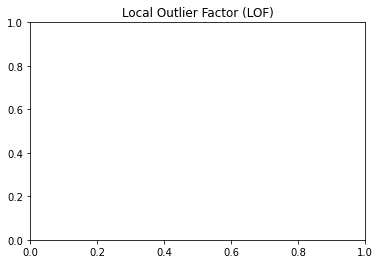

In [16]:
plt.title("Local Outlier Factor (LOF)")

In [17]:
X[:, 0]

array([ 2.14901425,  2.19430656,  1.92975399,  2.47376384,  1.85915768,
        1.86097469,  2.07258868,  1.48252465,  1.69615066,  1.72759278,
        2.43969463,  2.02025846,  1.83668518,  1.65470193,  1.81980839,
        1.81948802,  1.99595083,  2.24676347,  2.06265908,  1.60154419,
        2.22153997,  1.96530552,  1.5564434 ,  1.86180837,  2.10308549,
        2.09722519,  1.7969234 ,  2.30929986,  1.74823474,  2.09937903,
        1.85624773,  1.66809951,  2.24375775,  1.97839696,  2.10849081,
        2.10841868,  1.98925219,  1.21407647,  2.02611412,  2.02752823,
        1.93409843,  2.44336821,  1.75745192,  2.27462064,  1.84107194,
        2.02912326,  1.78938407,  1.88236755,  2.08883608,  2.00153404,
        1.57538878,  1.89718565,  1.95161429,  2.56585577,  2.07726512,
        1.42436864,  2.01806906,  1.94229171,  1.98958647,  2.34284684,
        2.23730958,  2.42083829,  2.17605713,  1.7028391 ,  2.02989541,
        1.53480097,  1.68130889,  1.72417273,  1.76502401,  2.24

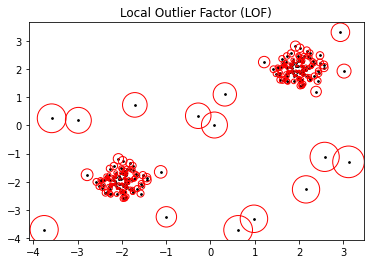

In [18]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

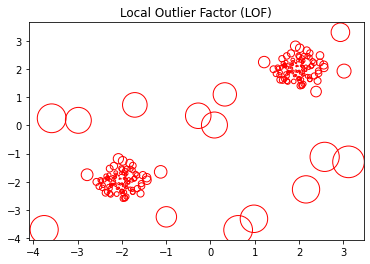

In [19]:
plt.title("Local Outlier Factor (LOF)")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')